In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.metrics import roc_auc_score
# import riiideducation
# from tqdm import tqdm

In [20]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('F:/data/riiid-test-answer-prediction/train.csv', nrows=10**7)
test = pd.read_csv("F:/data/riiid-test-answer-prediction/example_test.csv")
lectures = pd.read_csv("F:/data/riiid-test-answer-prediction/lectures.csv")
questions = pd.read_csv("F:/data/riiid-test-answer-prediction/questions.csv")

In [5]:
# train = pd.read_csv('train.csv', nrows=10**6)
# test = pd.read_csv("example_test.csv")
# lectures = pd.read_csv("lectures.csv")
# questions = pd.read_csv("questions.csv")

In [6]:
train_lec = train[train.content_type_id == 1]
TrLe=pd.merge(train_lec, lectures, left_on='content_id', right_on='lecture_id')

TrLe=TrLe[['timestamp','user_id','content_id','task_container_id','lecture_id','tag','part','type_of']]

In [7]:
train_que = train[train.content_type_id == 0]
TrQu=pd.merge(train_que, questions, left_on='content_id', right_on='question_id')
TrQu[['timestamp','user_id','content_id','task_container_id','user_answer','answered_correctly','prior_question_elapsed_time','prior_question_had_explanation','question_id','bundle_id','correct_answer','part','tags']]

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,115,5692,1,3,1,NaN,NaN,5692,5692,3,5,151
1,4216576228,24418,5692,497,3,1,21000.0,True,5692,5692,3,5,151
2,0,51285,5692,0,3,1,NaN,NaN,5692,5692,3,5,151
3,330907575,91216,5692,153,3,1,22000.0,True,5692,5692,3,5,151
4,560202977,138650,5692,122,3,1,18000.0,True,5692,5692,3,5,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804599,89614441,160905333,7568,90,0,1,15000.0,True,7568,7566,0,7,18 16 21
9804600,1718197416,184129602,4662,1511,1,1,20000.0,True,4662,4662,1,5,79
9804601,895221724,209508343,7848,606,1,0,60000.0,True,7848,7848,2,7,76 42 21
9804602,895221724,209508343,7850,606,2,1,60000.0,True,7850,7848,2,7,145 42 21


In [22]:
font1 = {'weight': 'bold',
         'size': 14
         }

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

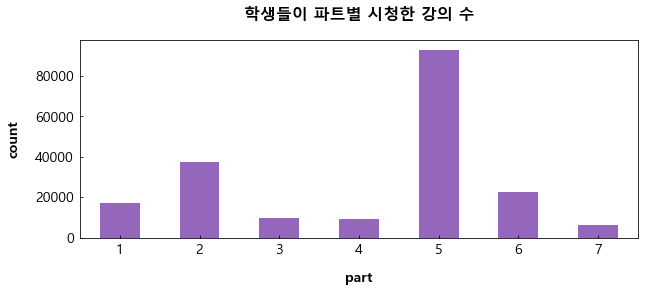

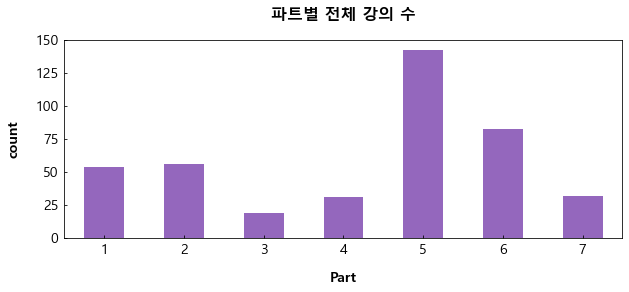

In [23]:
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_subplot(2,1,1)
ax1 = TrLe.groupby("part").count()['lecture_id'].plot.bar(color='#9467bd')
plt.title("학생들이 파트별 시청한 강의 수", fontdict=title_font, pad=20)
plt.xlabel("part", labelpad=15, fontdict=font1)
plt.ylabel("count", labelpad=15, fontdict=font1)
plt.tick_params(axis='both', direction='in', length=3, pad=6, labelsize=14)
plt.xticks(rotation=0)

fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_subplot(2,1,1)
ax2 = lectures.groupby("part").count()['lecture_id'].plot.bar(color='#9467bd')
plt.title("파트별 전체 강의 수", fontdict=title_font, pad=20)
plt.xlabel("Part", labelpad=15, fontdict=font1)
plt.ylabel("count", labelpad=15, fontdict=font1)
plt.tick_params(axis='both', direction='in', length=3, pad=6, labelsize=14)
plt.xticks(rotation=0)

plt.show()

In [9]:
TrLe

,timestamp,user_id,content_id,task_container_id,lecture_id,tag,part,type_of
0,653762,2746,6808,14,6808,129,2,intention
1,1623661788,24418,6808,121,6808,129,2,intention
2,600004996,91216,6808,312,6808,129,2,intention
3,2461208170,138650,6808,182,6808,129,2,intention
4,10318788851,166728,6808,331,6808,129,2,intention
...,...,...,...,...,...,...,...,...
195391,8091107978,119665027,12509,3107,12509,145,7,concept
195392,3286282003,172724515,12509,5668,12509,145,7,concept
195393,10847836267,210490864,12509,3665,12509,145,7,concept
195394,11443860923,80655348,20852,3741,20852,153,7,concept


In [10]:
tmp=pd.DataFrame(TrLe.groupby("task_container_id").user_id.count()) #
tmp=tmp.reset_index(drop=False)
tmp

,task_container_id,user_id
0,0,7
1,1,1
2,2,4
3,3,3
4,4,4
...,...,...
5974,9990,1
5975,9993,1
5976,9994,1
5977,9996,1


In [11]:
bin_labels_20 = [int((len(TrLe)/20)*x) for x in range(1,21)]
tmp['ts_bin'] = pd.qcut(tmp['task_container_id'], q=20, labels=bin_labels_20)
tmp

,task_container_id,user_id,ts_bin
0,0,7,9769
1,1,1,9769
2,2,4,9769
3,3,3,9769
4,4,4,9769
...,...,...,...
5974,9990,1,195396
5975,9993,1,195396
5976,9994,1,195396
5977,9996,1,195396


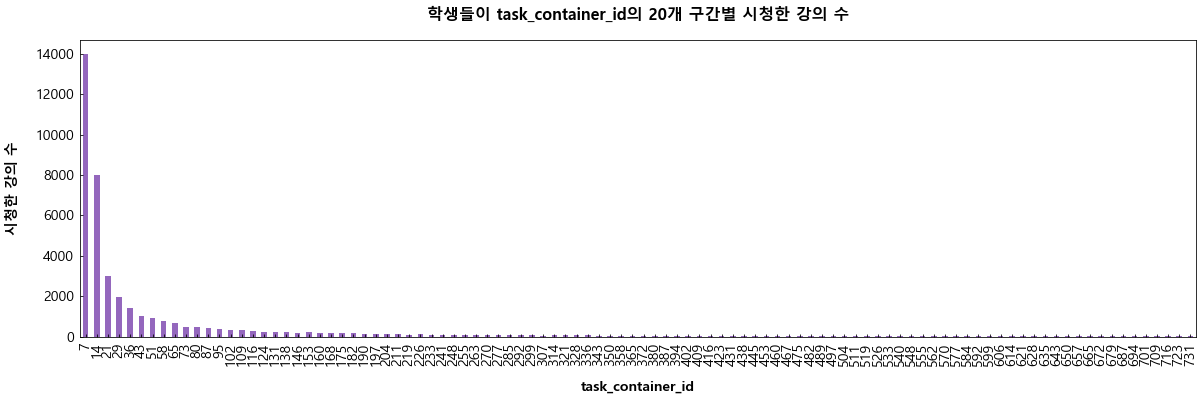

In [29]:
fig1=plt.figure(figsize=(20,12))
ax1 = fig1.add_subplot(2,1,1)
ax1 = tmp.groupby("ts_bin").sum()['user_id'].plot.bar(color='#9467bd')
plt.title("학생들이 task_container_id의 20개 구간별 시청한 강의 수", fontdict=title_font, pad=20)
plt.xlabel("task_container_id", labelpad=15, fontdict=font1)
plt.ylabel("시청한 강의 수", labelpad=15, fontdict=font1)
plt.xticks(rotation=90)
plt.tick_params(axis='both', direction='in', length=3, pad=6, labelsize=14)
plt.show()

In [13]:
TrQu.user_id.nunique()

39491

In [14]:
tmp=pd.DataFrame(TrQu.groupby("user_id").task_container_id.max())
tmp=tmp.reset_index(drop=False)

In [15]:
tmp=pd.DataFrame(tmp.groupby("task_container_id").user_id.count())
tmp=tmp.reset_index(drop=False)
tmp[:20]

,task_container_id,user_id
0,0,13
1,1,8
2,2,3
3,3,11
4,4,3
5,5,4
6,6,571
7,7,85
8,8,82
9,9,78


In [16]:
bin_labels_20 = [int(731/100*x) for x in range(1,101)]
tmp['ts_bin'] = pd.qcut(tmp['task_container_id'], q=100, labels=bin_labels_20)

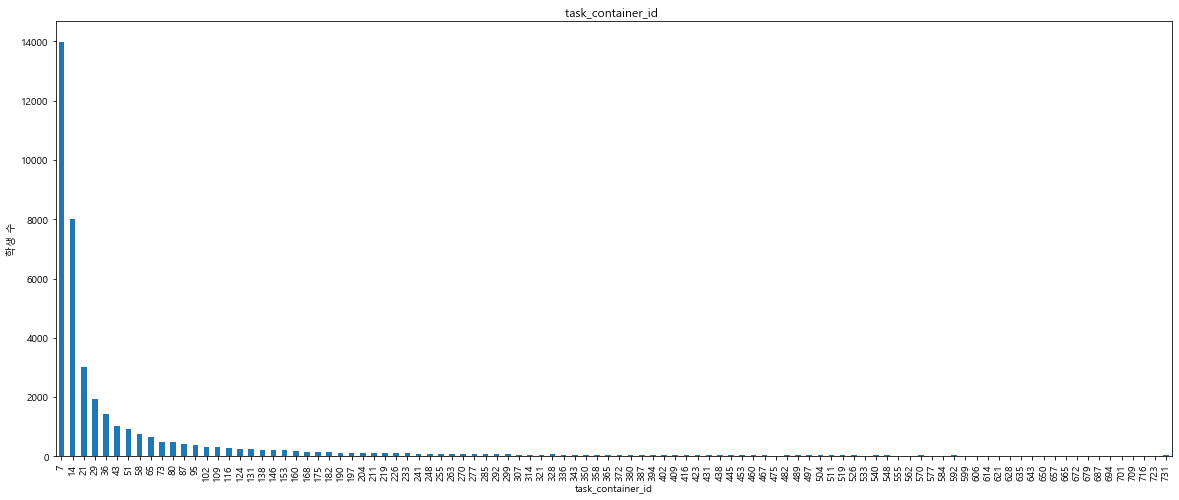

In [24]:
plt.figure(figsize=(20,8))
tmp.groupby("ts_bin").user_id.sum().plot.bar()
plt.title("task_container_id ")
plt.xlabel("task_container_id")
plt.ylabel("학생 수")
plt.xticks(rotation=90)
plt.show()

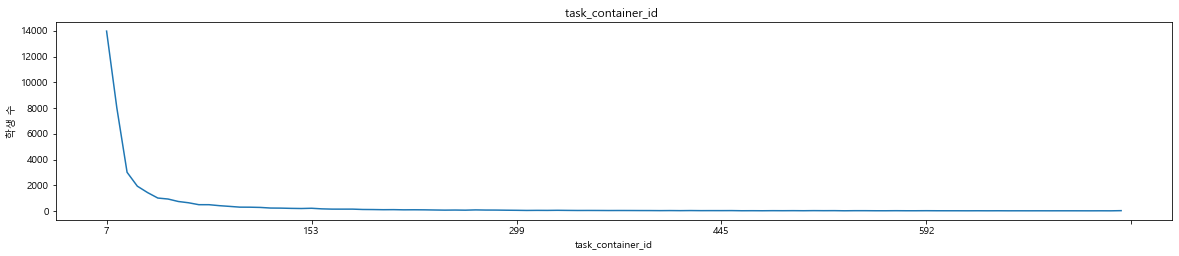

In [18]:
fig1=plt.figure(figsize=(20,8))
p = fig1.add_subplot(2,1,1)
p = tmp.groupby("ts_bin").user_id.sum().plot()
plt.title("task_container_id ")
plt.xlabel("task_container_id")
plt.ylabel("학생 수")
plt.xticks(rotation=0)
plt.show()

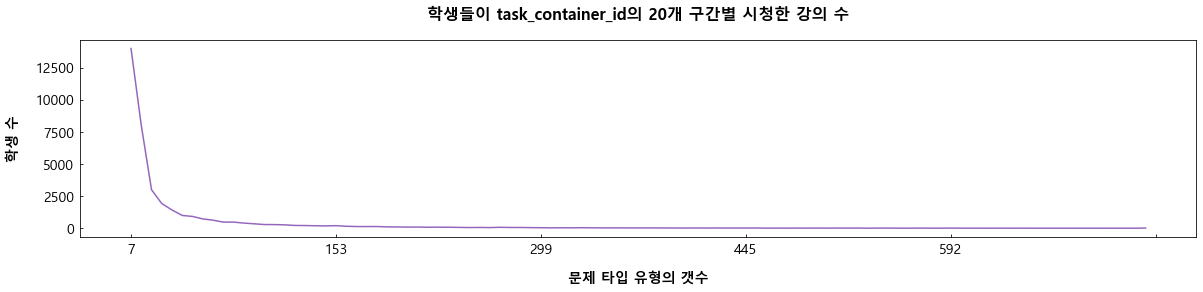

In [31]:
fig1=plt.figure(figsize=(20,8))
p = fig1.add_subplot(2,1,1)
p = tmp.groupby("ts_bin").user_id.sum().plot(color='#9467bd')

plt.title("학생들이 task_container_id의 20개 구간별 시청한 강의 수", fontdict=title_font, pad=20)
plt.xlabel("문제 타입 유형의 갯수", labelpad=15, fontdict=font1)
plt.ylabel("학생 수", labelpad=15, fontdict=font1)
plt.xticks(rotation=0)
plt.tick_params(axis='both', direction='in', length=3, pad=6, labelsize=14)
plt.show()